# Six Views of a Point Charge

One of the challenges of electrodynamics is developing an intuition for potentials and fields.  What is a field?  What does it *look* like?

We can answer the first question with a formal definition.  A ***field*** is a mathematical object that assigns a quantity to every point in space.  If the quantity is just a number, we call the object a ***scalar field***.  If the quantity is a vector, we call the object a ***vector field***.

It is hard to say what a field "looks like".  What does temperature look like?  What does gravity look like?  Even if we can't see the quantity in question, we have many ways to represent it.  This problem will introduce you to some useful Python functions as we explore the potentials and electric fields of electric charges.

## Point Charge

The electrostatic potential of a point charge is
$$V(\vec{r}) = \dfrac{kq}{r}$$

The electric field of a point charge is
$$\vec{E}(\vec{r}) = \dfrac{kq}{r^2} \hat{r}$$

The following Python ***functions*** will compute the potential and electric field of a point charge.

In [4]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [5]:
# Define functions to calculate fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

In [6]:
X, Y, Z = coordinates()
V = potential()
Ex, Ey, Ez = field()

Now that we have a scalar field and a vector field, let's look at them!

### 1. 1D Slices of Potential

The following code will plot the potential along three lines through a point you specify: one line parallel to the x-axis, one parallel to the y-axis, and one parallel to the z-axis.

The slices are taken through (x0,y0,z0) = (0.05, 0.55, 1.05).


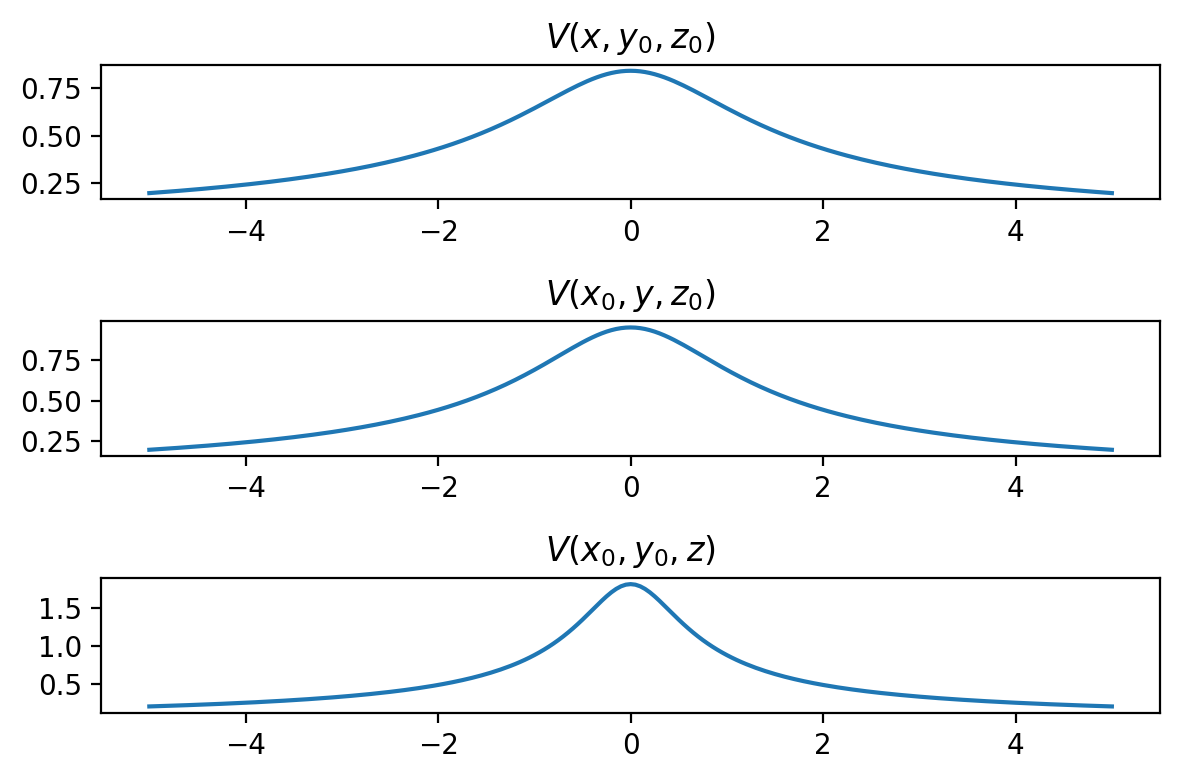

In [10]:
# Choose coordinate indices for slices.
x0 = 101
y0 = 111
z0 = 121

x_val = X[x0,y0,z0]
y_val = Y[x0,y0,z0]
z_val = Z[x0,y0,z0]

print("The slices are taken through (x0,y0,z0) = (%g, %g, %g)." % (x_val, y_val, z_val))

# Create a figure and plot the slices.
fig, ax = plt.subplots(3, dpi=200)

# Plot V(x,y0,z0)
x = X[:,y0,z0]
v1 = V[:,y0,z0]
ax[0].plot(x,v1)
ax[0].set_title(r"$V(x,y_0,z_0)$")

# Plot V(x0,y,z0)
y = Y[x0,:,z0]
v2 = V[x0,:,z0]
ax[1].plot(y,v2)
ax[1].set_title(r"$V(x_0,y,z_0)$")

# Plot V(x0,y0,z)
z = Z[x0,y0,:]
v3 = V[x0,y0,:]
ax[2].plot(z,v3)
ax[2].set_title(r"$V(x_0,y_0,z)$")


fig.tight_layout()

Change the values of `x0`, `y0`, and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the potential reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

I tried changing the values one at a time to see how changing just one axis affected the plots, which allowed me to visualize/conceptualize the representation better. 

Information provided: the graph just tells us the potential and how it changes as it moves parallel to one axis, through one point, defined by coordinates in the other two axes. This tells us how potential changes along each direction in 3D
Limitations: the plots are representing one dimension of a 3-dimensional thing in two dimensions, and they are not representing movement along the axis, but what is happening with the potential as it moves along that axis/through the point (I'm not sure if that makes sense, but it makes sense in my head)

Note to self: After doing this a few times, I ran into an error saying X is not defined, when assigning x_val = X[x0,y0,z0] but it was the same as y_val and z_val and I compared every line of code with the original, then copied/pasted the original, which didn't work. I did get it to work by re-running evry cell in order.

### 2. 2D Slices of Potential

The cell below will plot a 2D slice of the potential through a height that you specify.

It will display a surface plot and a heatmap. 

The slice is taken through z0 = 1.05.


(-5.0, 5.0, -5.0, 5.0)

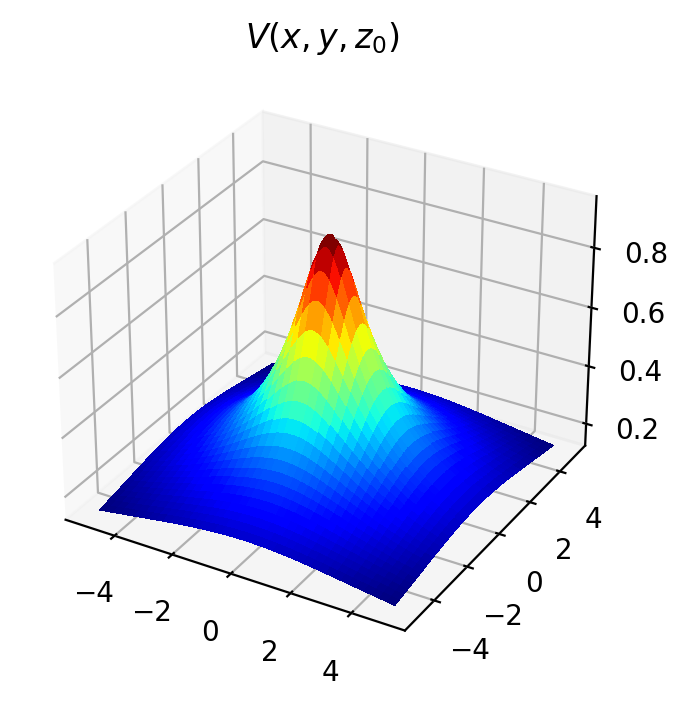

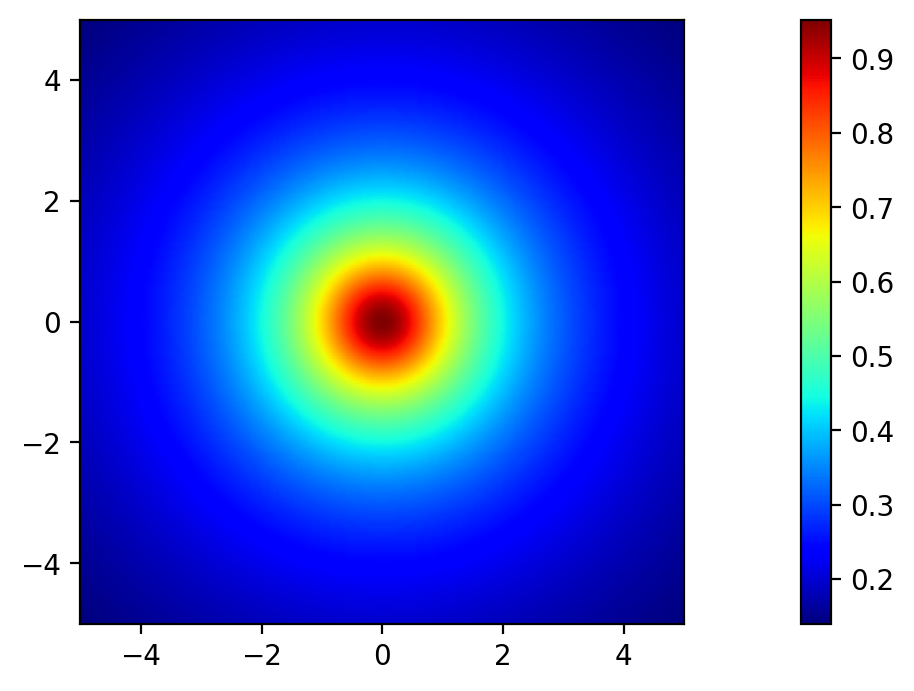

In [12]:
# Choose z-coordinate index for slices.
z0 = 121
z_val = Z[x0,y0,z0]

print("The slice is taken through z0 = %g." % z_val)

# Get slice
x = X[:,:,z0]
y = Y[:,:,z0]
v = V[:,:,z0]

# Create a surface plot.
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(x,y,v, cmap='jet', antialiased=False, linewidth=0)
ax1.set_title(r"$V(x,y,z_0)$")

# Heatmap
fig, ax2 = plt.subplots(dpi=200)
image = ax2.pcolormesh(x,y,v, shading='gouraud', cmap='jet')
plt.colorbar(image, use_gridspec=True)
ax2.axis('scaled')

Change the value of `z0` in the cell above and run it again.  Do this several times.

What does this representation of the potential reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

When z0 = 121, both plots are centered and the slope is pretty steep, causing it to narrow; when z0 becomes substantially smaller (0-50) OR bigger (150-200) the peak of the graphs becomes lower and wider, w a more gradual slope. However, when z0 = 100 the graph gets super narrow, but still the same max height as when z0 =121. When z0 = 75 the graphs show something b/w z0 = 50 and z0 = 121. So, I think it is highest/most narrow when z0 = 100, then gets wider as we move along the z-axis either direction.
I think this is because the potential is highest at the poing where the field points directly outward. The field is constant all the way around the point as long as the distance stays the same, but if we move further away or at an angle not parallel with the field, the effect is felt less or not at all, respectively.
The limitations here for me was mainly that the plots aren't given any definition or unit value, which makes it hard for me to visuallize what the plot actually means.

### 3. 1D Slices of Electric Field

The following code will plot the components of the electric field along three lines through a point you specify: one line parallel to the x-axis, one parallel to the y-axis, and one parallel to the z-axis.

The slices are taken through (x0,y0,z0) = (1.05, 1.05, 1.05).


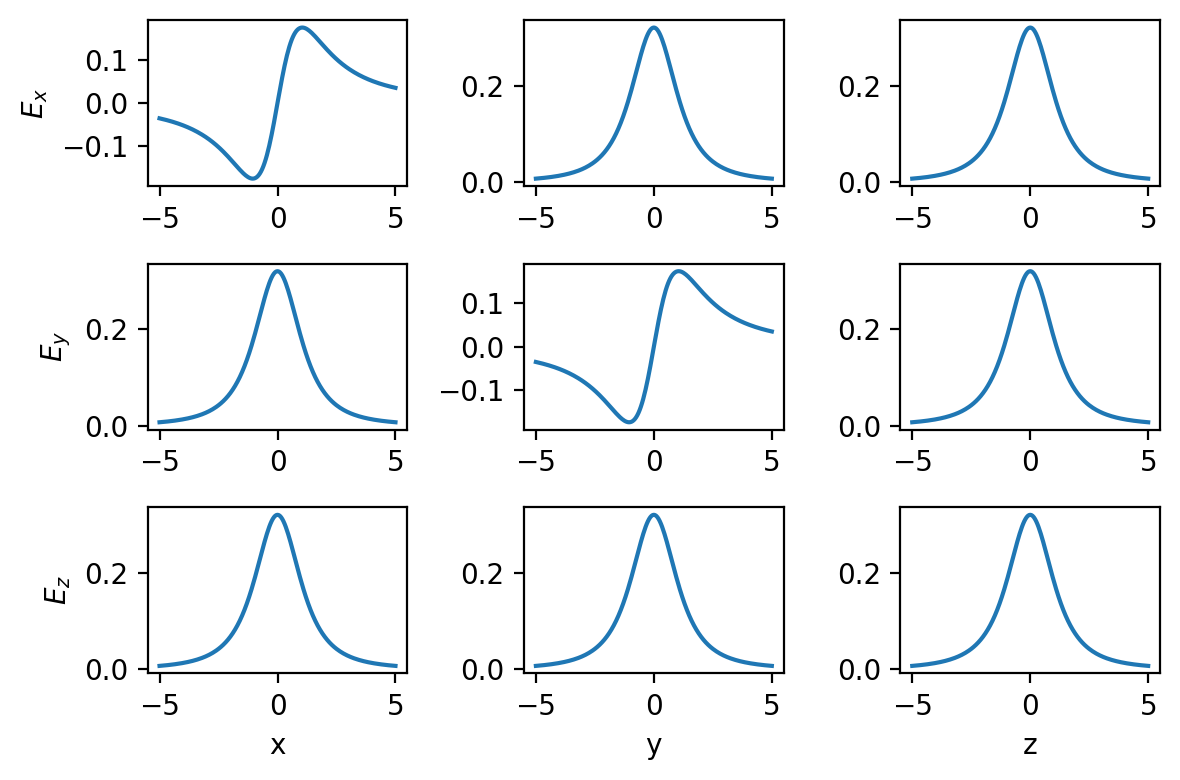

In [57]:
# Choose coordinate indices for slices.
x0 = 121
y0 = 121
z0 = 121

x_val = X[x0,y0,z0]
y_val = Y[x0,y0,z0]
z_val = Z[x0,y0,z0]

print("The slices are taken through (x0,y0,z0) = (%g, %g, %g)." % (x_val, y_val, z_val))

# Create a figure and plot the slices.
fig, ax = plt.subplots(3,3, dpi=200)

# Plot components of E(x,y0,z0)
x = X[:,y0,z0]
y = Y[x0,:,z0]
z = Z[x0,y0,:]


Ex1 = Ex[:,y0,z0]
ax[0,0].plot(x,Ex1)
ax[0,0].set_ylabel(r"$E_x$")

Ey1 = Ey[:,y0,z0]
ax[1,0].plot(x,Ey1)
ax[1,0].set_ylabel(r"$E_y$")

Ez1 = Ez[:,y0,z0]
ax[2,0].plot(x,Ez1)
ax[2,0].set_ylabel(r"$E_z$")
ax[2,0].set_xlabel('x')


Ex2 = Ex[x0,:,z0]
ax[0,1].plot(y,Ex2)

Ey2 = Ey[x0,:,z0]
ax[1,1].plot(y,Ey2)

Ez2 = Ez[x0,:,z0]
ax[2,1].plot(y,Ez2)
ax[2,1].set_xlabel('y')


Ex3 = Ex[x0,y0,:]
ax[0,2].plot(z,Ex3)

Ey3 = Ey[x0,y0,:]
ax[1,2].plot(z,Ey3)

Ez3 = Ez[:,y0,z0]
ax[2,2].plot(z,Ez3)
ax[2,2].set_xlabel('z')

fig.tight_layout()

Change the values of `x0`, `y0`, and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

I again tried changing the values one at a time to see how changing just one axis affected the plots, which allowed me to visualize/conceptualize the representation better. The most significant thing I noticed is that every plot is symettrical in one way across the 0 (two are upside down, but still mirroring what's happening on the other side of 0). Also, the E (x and y) along x and y have high and low points, wheres the others do not. I think this is because the field is symetrical, so what happens along the y axis (and x) in one direction happens the same but opposite 180 degrees in the other direction, but z is height/distance from the point, so E stays the same (not opposite) everywhere, and just decreases the father away the point gets.

The limitations here for me are the same as above: mainly that the plots aren't given any definition or unit value.

### 4. 2D Slices of Electric Field

The cell below will plot a 2D slice of the components of the electric field through a height that you specify.

It will display a surface plot and a heatmap of each component. 

The slice is taken through z0 = 5.


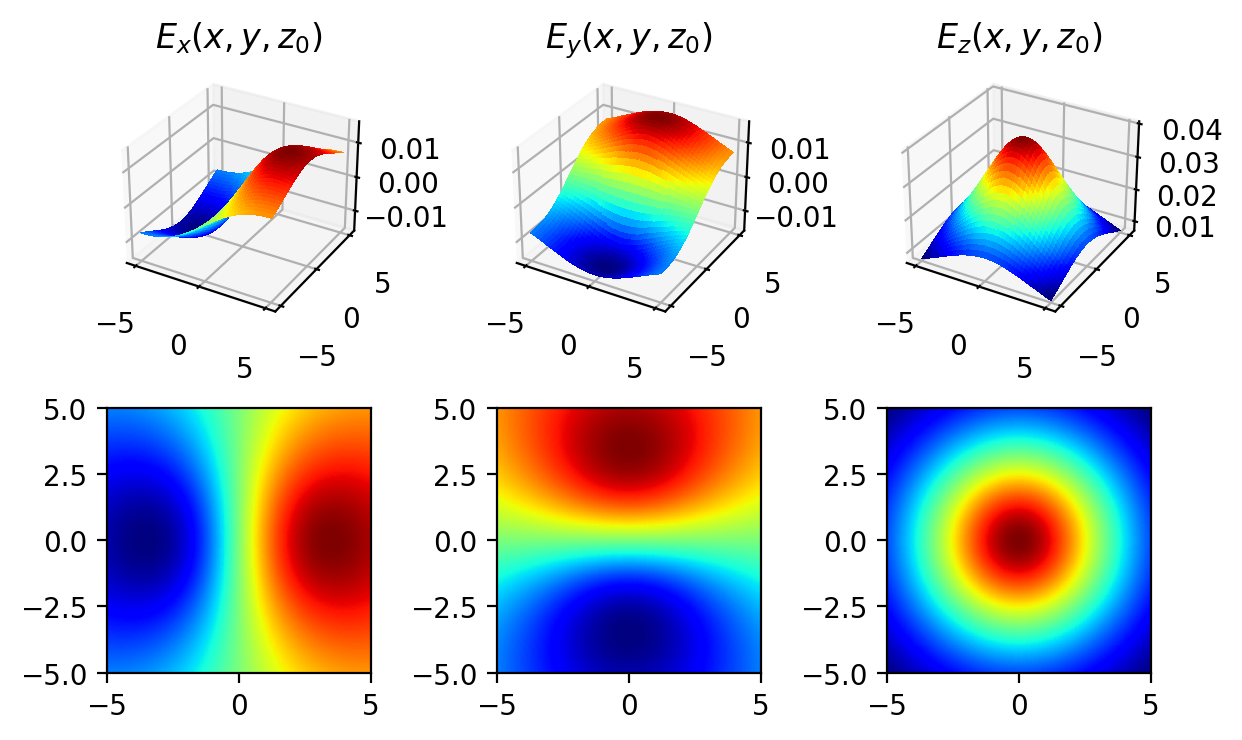

In [62]:
# Choose z-coordinate index for slices.
z0 = 200
z_val = Z[x0,y0,z0]

print("The slice is taken through z0 = %g." % z_val)

# Get slices
x = X[:,:,z0]
y = Y[:,:,z0]
ex = Ex[:,:,z0]
ey = Ey[:,:,z0]
ez = Ez[:,:,z0]

# Create a surface plots.
fig = plt.figure(dpi=200)

ax = fig.add_subplot(2,3,1, projection='3d')
ax.plot_surface(x,y,ex, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_x(x,y,z_0)$")

ax = fig.add_subplot(2,3,2, projection='3d')
ax.plot_surface(x,y,ey, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_y(x,y,z_0)$")

ax = fig.add_subplot(2,3,3, projection='3d')
ax.plot_surface(x,y,ez, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_z(x,y,z_0)$")

# Heatmaps
ax = fig.add_subplot(2,3,4)
image = ax.pcolormesh(x,y,ex, shading='gouraud', cmap='jet')
ax.axis('scaled')

ax = fig.add_subplot(2,3,5)
image = ax.pcolormesh(x,y,ey, shading='gouraud', cmap='jet')
ax.axis('scaled')

ax = fig.add_subplot(2,3,6)
image = ax.pcolormesh(x,y,ez, shading='gouraud', cmap='jet')
ax.axis('scaled')

fig.tight_layout()

# image = ax.pcolormesh(x,y,v, shading='gouraud', cmap='jet')
# plt.colorbar(image, use_gridspec=True)
# ax.axis('scaled')

Change the value of `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

I had basically the same results as when I adjusted height for the potential, except, as found in P3, E is opposite/equal on either so of 0 for x/y but just decreases symetrically as z gets further away. 

Limitations: I wish it was interactive so I could look around the 3D

### 5. Quiver Plots of Electric Field

The cell below will create a 3D "quiver plot" of the electric field and a 2D quiver plot of a slice through the electric field.

In [63]:
# Uncomment the last line for interactive plots.

%matplotlib inline
# %matplotlib notebook

(-5.5, 5.5, -5.5, 5.5)

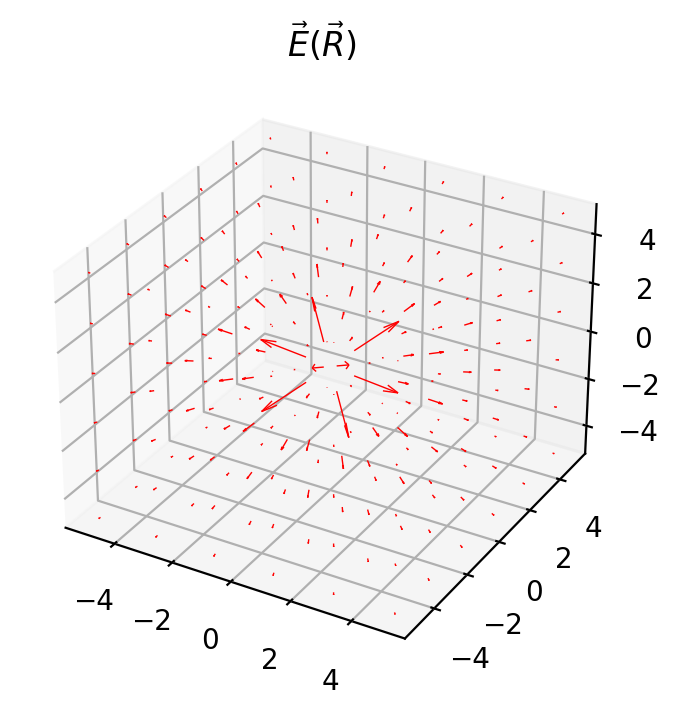

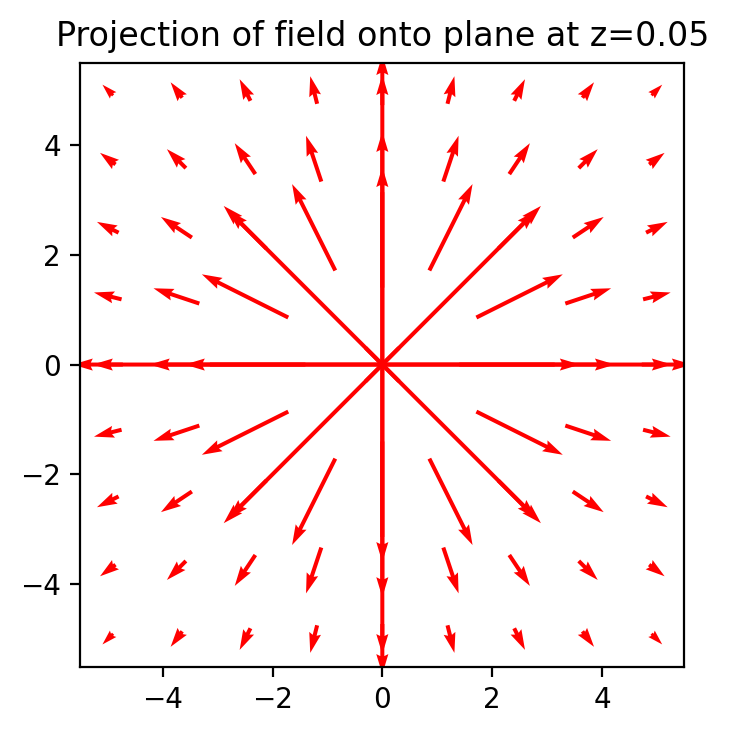

In [74]:
# Create a quiver plot.
# Use a coarser grid.
stride = 40
x = X[::stride,::stride,::stride].copy()
y = Y[::stride,::stride,::stride].copy()
z = Z[::stride,::stride,::stride].copy()
ex = Ex[::stride,::stride,::stride].copy()
ey = Ey[::stride,::stride,::stride].copy()
ez = Ez[::stride,::stride,::stride].copy()

# Set max length to improve visibility in plot.
ecut = 1
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ez[ez>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut
ez[ez<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=5, linewidth=0.5, color='red')
ax.set_title(r"$\vec{E}(\vec{R})$")

# Make a 2D plot of a slice of the field.
z0 = -100
z_val = Z[0,0,z0]

# Use a coarser grid.
stride = 25
x = X[::stride,::stride,z0].copy()
y = Y[::stride,::stride,z0].copy()
ex = Ex[::stride,::stride,z0].copy()
ey = Ey[::stride,::stride,z0].copy()

# Set max length to improve visibility in plot.
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.quiver(x,y,ex,ey, pivot='middle', scale=0.8, linewidth=0.5, color='red')
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

Change the values of `ecut` and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

I'm not really sure what ecut is, but the only time it changes the plot is when it becomes negative: the 3D plot goes crazy, but the 2D plot begins all pointing in the same direction. I'm not sure what this reveals though.

When I change z0 the direction never changes, but the length of the vectors does. I think this is again because the farther away you get from the source, the weaker E gets,

### 6. Streamlines of the Electric Field

The cell below will draw three dimensional "field lines" of the electric field.

(-5.0, 5.0, -5.0, 5.0)

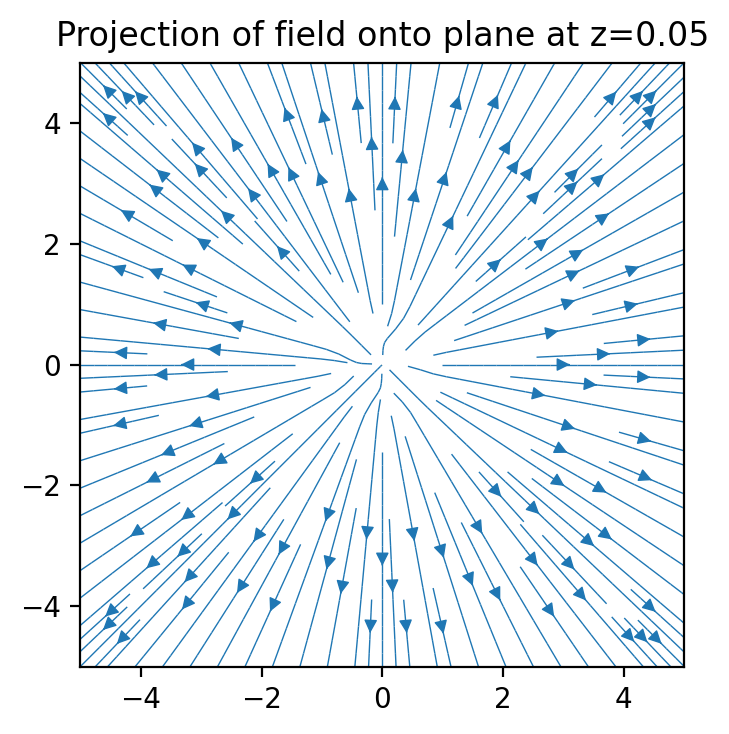

In [91]:
# Make a 2D plot of a slice of the field.
z0 = -100
z_val = Z[0,0,z0]

# Use a coarser grid.
stride = 1
x = X[::stride,::stride,z0].copy().T
y = Y[::stride,::stride,z0].copy().T
ex = Ex[::stride,::stride,z0].copy().T
ey = Ey[::stride,::stride,z0].copy().T

# Set max length to improve visibility in plot.
ecut = 1
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.streamplot(x,y,ex,ey, linewidth=0.5, density=1.5)
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

Change the values of `ecut` and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

When ecut becomes (-) the filed points entirely in one direction, rather than in all directions. I can't find a change in z0 that changes the plot (+ or -) in any big way, but when z0 = 100 the lines start squiggly. This doesn't appear to change the overall field though. I wonder if at that distance, there is something interfering with the field?

Honestly, the biggest limitation for this one is I don't really understand what z0 and ecut are.

## Reflection

All of these plots are representations of the same underlying physical entity: the electromagnetic field of a single point charge.  Which did you find most useful?  Confusing?  Can you think of another way to represent a three-dimensional electric field or scalar field?

***Type your response in the box below.***